In [338]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import seaborn as sns

In [339]:
import warnings
warnings.simplefilter('ignore')

In [340]:
happy_df_original = pd.read_csv('2022.csv', sep=',')
happy_df = happy_df_original.copy(deep=True)

In [341]:
st.header("Introduction")
st.markdown("This project is dedicated to the analysis of a dataset containing information about the level of happiness in 146 countries."
            "The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale."
            "This report has the following scales: GDP per capita, Social support, Life expectancy, Freedom, Generosity, Corruption"
            ""
            "You may also notice the term dystopia. Dystopia is a fictional state, each of the scales of which are equal to the minimum values in the world. There is no country less happy than Dystopia, which makes it possible to compare states not only with each other, but also with this absolute minimum."
            "But in this dataset, Dystopia is also used to demonstrate unexplained factors when calculating the level of happiness in a country. The Dystopia (1.83) + residual column is responsible for this"
            ""
            "It is also worth explaining the concepts of whisker-low and whisker-high. They are responsible for the bottom 25% of responses and the top 25% of responses, respectively."
            ""
            "There is also an asterisk in the names of some states. This indicates that some of the collected data on the state may not be objective enough due to the small number of respondents. However, I will not pay attention to this in my work, because I do not have a better alternative in any case.")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [342]:
st.subheader("Data cleanup")
st.markdown("To begin with, I suggest reading the information about the contents of the dataset. The number of NaN, as well as its shape. For this I will use .info() method. I'm also going to output all the values with NaN, if there are any.")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [343]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [344]:
happy_df[happy_df.isna().any(axis=1)]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
st.markdown("As you can see, there is an empty string in the dataset. This line is not responsible for any state and is the closing element of the dataset. We don't need it, so I'll delete it."
            "But there is also good news, all the values have already been set in the types that suit me, so there is no need it data transformation."
            "It is also worth noting that the shape of the dataset corresponds to 12 columns and 146 rows")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [346]:
happy_df.dropna(inplace=True)
happy_df.reset_index(inplace=True, drop=True)
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [347]:
happy_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [348]:
st.markdown('It looks like we are done at this stage and can move on to the next one...')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [349]:
st.subheader("Statistics and description")
st.markdown('In this section, I suggest looking at the top 5 happiest and most unhappy countries. And I also offer some statistical data on the most interesting criteria in my opinion.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [350]:
happy_df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [351]:
happy_df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [352]:
happy_df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [353]:
st.markdown('At this stage, you can already see interesting statistics. The five happiest countries in the world are the developed countries of Europe with a relatively small population, but a strong economy.'
            'At the same time, the most unhappy countries in the world are 4 countries from Africa and 1 country from Asia in a state of civil war (at the time of the survey). These States have not the smallest population and natural resources, but their population is unhappy.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [354]:
print("Mean happiness: ", round(happy_df['Happiness score'].mean(), 2))
print("Median happiness: ", round(happy_df['Happiness score'].median(), 2))
print("Happiness std: ", round(happy_df['Happiness score'].std(), 2))

Mean happiness:  5.55
Median happiness:  5.57
Happiness std:  1.09


In [355]:
st.markdown('At this point, you can also draw interesting conclusions. The median and average values are almost equal, which indicates a very uniform "distribution" of happiness.'
            "At the same time, both the mean and median values give a rating higher than 5/10, which suggests that in general, the world's population (by state, not in number) estimates its level of happiness at a slightly higher than the \"normal\" level"
            "It is also worth noting that std is presented at a fairly high level and is a rating unit.")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [356]:
print("Mean GDP impact: ", round(happy_df['Explained by: GDP per capita'].mean(), 2))
print("Median GDP impact: ", round(happy_df['Explained by: GDP per capita'].median(), 2))
print("GDP impact std: ", round(happy_df['Explained by: GDP per capita'].std(), 2), "\n")
print("Maximum GDP impact: ", happy_df['Explained by: GDP per capita'].max())

Mean GDP impact:  1.41
Median GDP impact:  1.45
GDP impact std:  0.42 

Maximum GDP impact:  2.209


In [357]:
st.markdown('In this case, it was also necessary to deduce the maximum level of the impact of GDP in order to be able to estimate the mean and median values.'
            'In general, the same situation is repeated here as in the case of the final level of happiness, which suggests that this trend is characteristic of all criteria.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [358]:
print("Mean freedom impact: ", round(happy_df['Explained by: Freedom to make life choices'].mean(), 2))
print("Median freedom impact: ", round(happy_df['Explained by: Freedom to make life choices'].median(), 2))
print("Freedom impact std: ", round(happy_df['Explained by: Freedom to make life choices'].std(), 2), "\n")
print("Maximum freedom impact: ", happy_df['Explained by: Freedom to make life choices'].max())

Mean freedom impact:  0.52
Median freedom impact:  0.54
Freedom impact std:  0.15 

Maximum freedom impact:  0.74


In [359]:
st.markdown('Yes, checking another criterion confirms the hypothesis that all criteria have very close mean and median values. At the same time, in general, each criterion is evaluated by the population above "normal".'
            'At this point, I propose to finish this stage and move on to a more complete analysis of the dataset.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [360]:
st.subheader('Some insights')
st.markdown('At this stage, I\'m going to visualize the distribution of happiness by country and test two hypotheses.'
            'The first hypothesis is that as the overall level of happiness increases, the level of corruption in the state will gradually decrease.'
            'The second hypothesis is that as social support and life expectancy increase, the average level of GDP per capita will increase at the same time.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [361]:
fig = px.bar(happy_df, x='Country', y='Happiness score')
fig.show()

In [362]:
st.markdown('And here is a chart with a demonstration of all levels of general happiness in all countries. Looking at this graph, you can visually notice that the previous idea that the distribution is generally uniform, but at the same time more inclined to an estimate above "normal" is once again confirmed.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [363]:
fig = px.line(happy_df, x="Happiness score", y="Explained by: Perceptions of corruption",
              title='Changes in corruption level with increase of total happiness.')
fig.show()

In [364]:
st.markdown('At this stage, it can be noted that there was no confirmation of the hypothesis of corruption. And although the level of corruption is really higher at low levels of happiness, and it is much lower in the happiest countries. All other countries, regardless of their level of happiness, fluctuates very much.'
            'It is also worth clarifying that in this particular case, a high value on the graph is equivalent to low corruption and vice versa.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [365]:
fig = px.scatter(happy_df, x="Explained by: Social support", y="Explained by: Healthy life expectancy",
                 color='Explained by: GDP per capita')
fig.show()

In [366]:
st.markdown('')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [367]:
st.markdown('At this stage, it would be possible to check a fairly large amount of data, but I believe that I have checked the most interesting of them, and therefore I suggest moving to the next stage.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [368]:
st.subheader('Comparisons')
st.markdown('At this stage, it is proposed to make a comparison of the happiest and the most unhappy state and see what gives the main contribution to their level of happiness.'
            'Another idea is to compare all the criteria for assessing happiness in the country and try to find patterns or highlight some insights.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [369]:
columns = list(happy_df.columns)

In [370]:
happy_df_finland = pd.DataFrame([[happy_df.iat[0, 6], columns[6][14:]], [happy_df.iat[0, 7], columns[7][14:]],
                                 [happy_df.iat[0, 8], columns[8][14:]], [happy_df.iat[0, 9], columns[9][14:]],
                                 [happy_df.iat[0, 10], columns[10][14:]], [happy_df.iat[0, 11], columns[11][14:]]],
                                columns=['Sources', 'Names'])
fig_fin = px.pie(happy_df_finland, values='Sources', names='Names', title='Sources of Finland happiness')

happy_df_afghanistan = pd.DataFrame([[happy_df.iat[145, 6], columns[6][14:]], [happy_df.iat[145, 7], columns[7][14:]],
                                     [happy_df.iat[145, 8], columns[8][14:]], [happy_df.iat[145, 9], columns[9][14:]],
                                     [happy_df.iat[145, 10], columns[10][14:]], [happy_df.iat[145, 11], columns[11][14:]]],
                                    columns=['Sources', 'Names'])
fig_afg = px.pie(happy_df_afghanistan, values='Sources', names='Names', title='Sources of Afghanistan happiness')

fig_fin.show()
fig_afg.show()

In [371]:
st.markdown('Despite the fact that, as expected, the differences in the criteria are significant, the surprising fact is that the inhabitants of the most unhappy country find only the level of GDP per capita and life expectancy happy. Moreover, the contribution of GDP per capita exceeds 50%.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

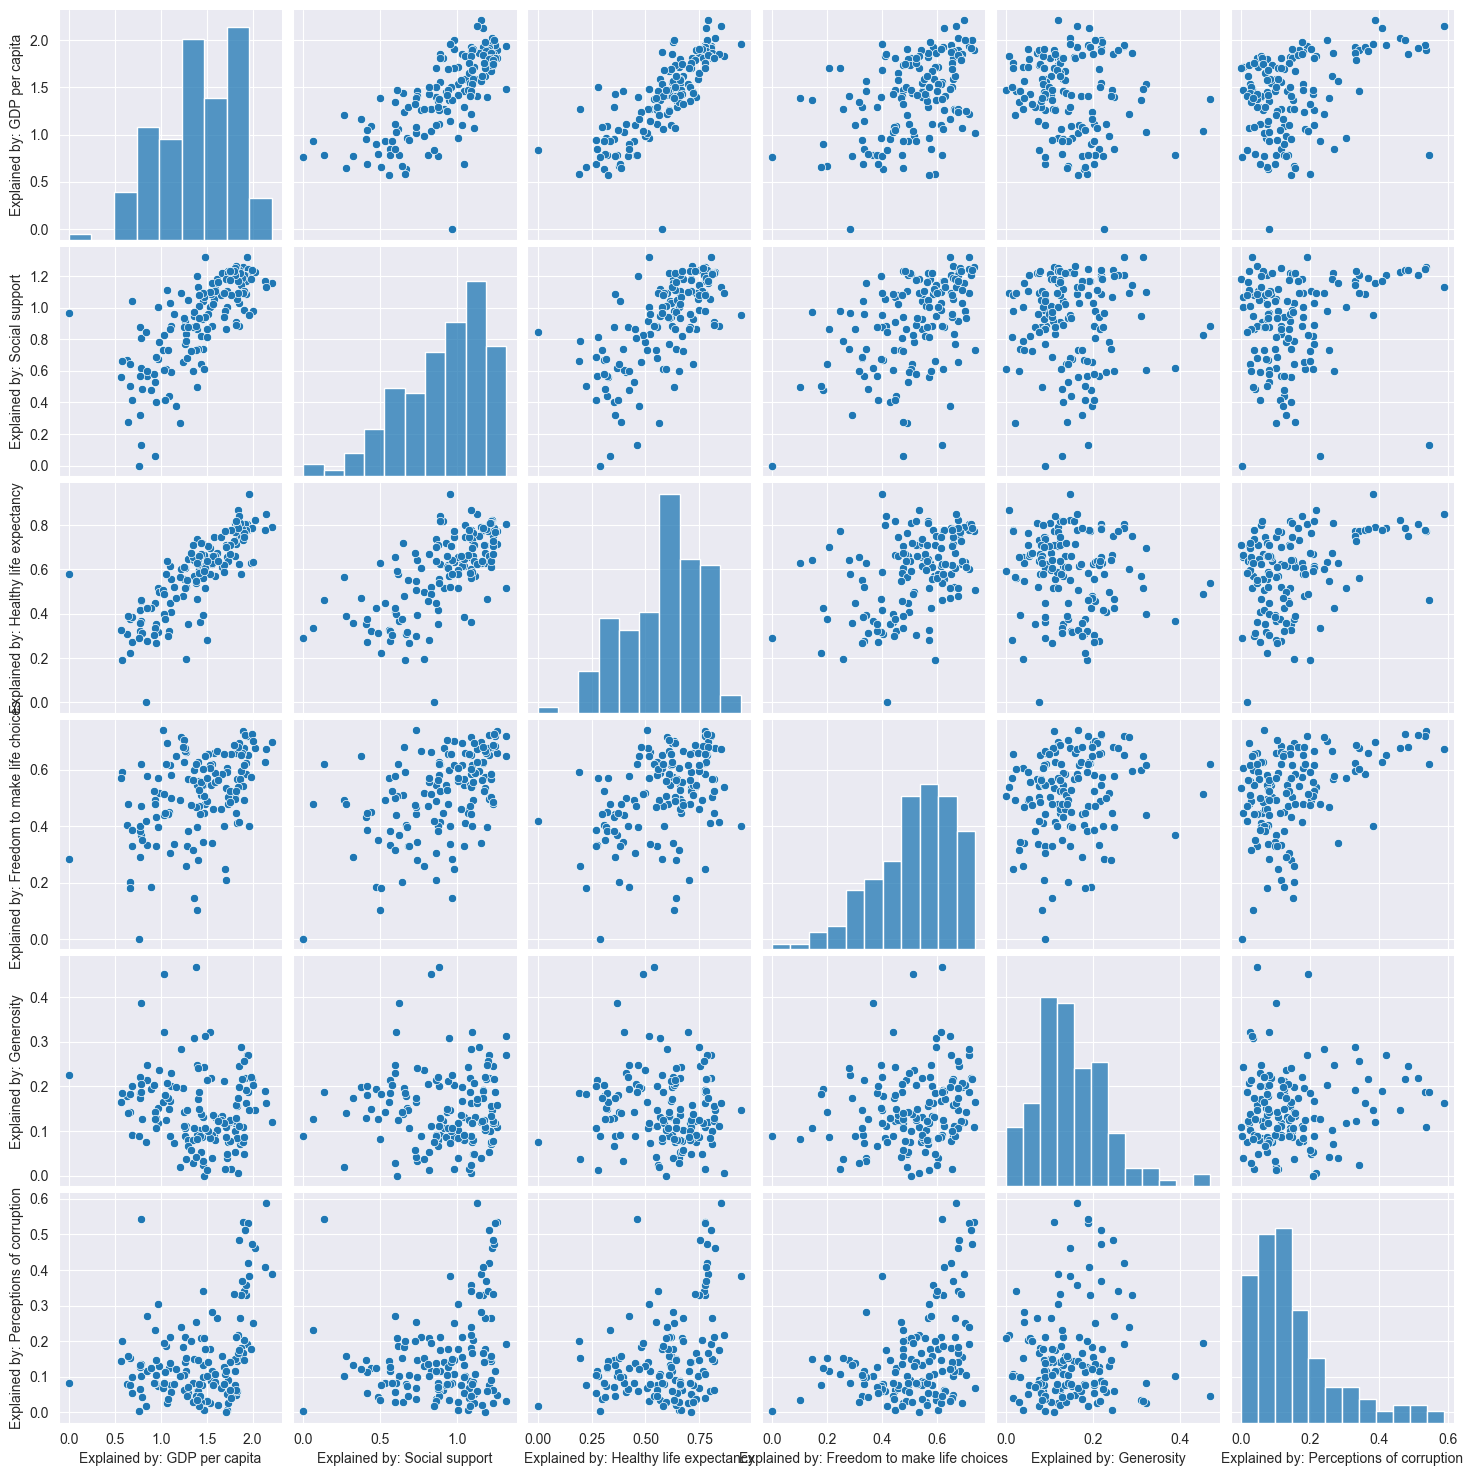

In [372]:
sns.pairplot(happy_df[list(happy_df.columns)[6:]])
print()

In [373]:
st.markdown('Here you can really notice that there are some patterns. The most noticeable of all is that the values are somehow grouped inside the charts.'
            'But the most interesting thing is that the behavior of social support and life expectancy are almost completely identical, and therefore it can be concluded that these two factors are somehow interrelated.'
            'It is also interesting to find that as the level of corruption in the country decreases, other factors also become noticeably higher. However, it seems that there is a certain threshold at the level of 0.3, to which the change in the influence of corruption in general is hardly noticeable.'
            'It is also interesting to note that generosity is more common at low values and with high corruption. And as corruption decreases, generosity units become more and more rare.'
            ''
            'At this stage, these are all interesting patterns and insights that I managed to find in this comparison, and therefore I suggest moving to the next stage.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [374]:
st.subheader('Main hypothesis')
st.markdown('My main hypothesis is to check how objectively residents assess their overall satisfaction with life in the country, taking into account the criteria. And is there any relationship between the objectivity or bias of the assessment and the spread of assessments as such.'
            'To this end, I will calculate the residual and whisker difference, see how the residual changes as the overall level of happiness changes, and also look at the correlation between the residual and whisker difference.'
            'And I will also check the same data on a mean level.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [375]:
residual = happy_df['Dystopia (1.83) + residual'] - 1.83
residual.rename('Residual', inplace=True)
happy_df = pd.concat([happy_df, residual], axis=1)

whisker_difference = happy_df["Whisker-high"] - happy_df['Whisker-low']
whisker_difference.rename('Whisker difference', inplace=True)
happy_df = pd.concat([happy_df, whisker_difference], axis=1)

In [376]:
print("Mean value of happiness: ", round(happy_df['Happiness score'].mean(), 2))
print("Mean value of residual: ", round(happy_df['Residual'].mean(), 2))
print("Mean value of whisker difference: ", round(happy_df['Whisker difference'].mean(), 2))

fig = px.scatter(happy_df, x="Happiness score", y="Residual", size='Whisker difference')
fig.show()

Mean value of happiness:  5.55
Mean value of residual:  0.0
Mean value of whisker difference:  0.24


In [377]:
st.markdown('Based on all the information I have received, I can draw several conclusions:'
            '1. Residents of less happy states tend to exaggerate the final quality of life in their country. While residents of happy countries are more critical of their state.'
            '2. I could not find a connection between the residual and whisker difference, but I managed to find that the lower the overall level of happiness in the state, the more likely it is that residents will strongly differ in opinions.'
            '3.It is interesting to find that the mean value of the residual is zero. I believe this means that people are equally prone to exaggerate and underestimate the living conditions around them.'
            ''
            'And this brings me to the end of my project work.')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)